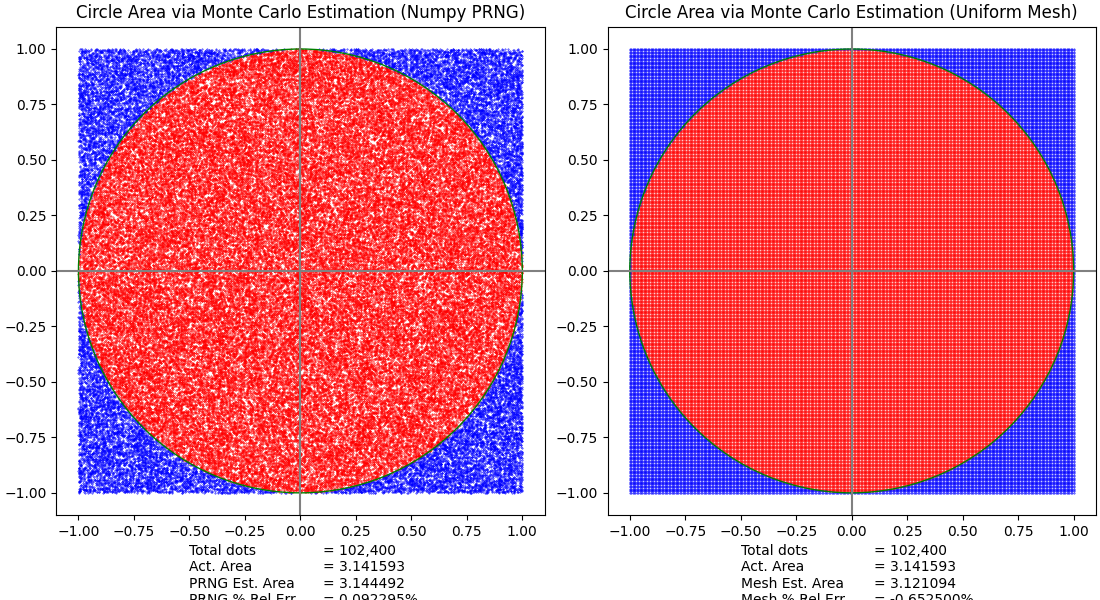

In [1]:
"""mc_circle_prng.ipynb"""
# Cell 1

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
from numpy.random import default_rng

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.random import Generator
    from numpy.typing import NDArray

%matplotlib widget

iterations_sqrt = 320
iterations: int = iterations_sqrt**2


def plot_prng(ax: Axes) -> None:
    rng: Generator = default_rng(seed=2020)
    x: NDArray[np.float_] = rng.random(iterations) * 2 - 1
    y: NDArray[np.float_] = rng.random(iterations) * 2 - 1

    d: NDArray[np.float_] = x**2 + y**2

    x_in: NDArray[np.float_] = x[d <= 1.0]
    y_in: NDArray[np.float_] = y[d <= 1.0]
    x_out: NDArray[np.float_] = x[d > 1.0]
    y_out: NDArray[np.float_] = y[d > 1.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area: float = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area: float = np.pi
    err: float = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Numpy PRNG)")
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    # fmt: off
    ax.text(-0.50, -1.5,
             "Total dots\nAct. Area\nPRNG Est. Area\nPRNG % Rel Err", ha="left")

    ax.text(0.10, -1.5,
             f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}",
             ha="left")
    # fmt: on


def plot_mesh(ax: Axes) -> None:
    # Use an equally spaced mesh
    x: NDArray[np.float_] = np.linspace(0, 1, iterations_sqrt, dtype=np.float64) * 2 - 1
    y: NDArray[np.float_] = np.linspace(0, 1, iterations_sqrt, dtype=np.float64) * 2 - 1
    xv: NDArray[np.float_]
    yv: NDArray[np.float_]
    xv, yv = np.meshgrid(x, y)
    x = xv.flatten()
    y = yv.flatten()

    # Calculate distance from origin for each (x,y) point
    d: NDArray[np.float_] = x**2 + y**2

    # Select the points inside the circle
    x_in: NDArray[np.float_] = x[d <= 1.0]
    y_in: NDArray[np.float_] = y[d <= 1.0]

    # Select the points outside the circle
    x_out: NDArray[np.float_] = x[d > 1.0]
    y_out: NDArray[np.float_] = y[d > 1.0]

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    ax.scatter(x_in, y_in, color="red", marker=MarkerStyle("."), s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=MarkerStyle("."), s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area: float = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area: float = np.pi
    err: float = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Uniform Mesh)")
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    # fmt: off
    ax.text(-0.50, -1.5,
             "Total dots\nAct. Area\nMesh Est. Area\nMesh % Rel Err", ha="left")

    ax.text(0.10, -1.5,
             f"= {iterations:,}\n= {act_area:.6f}\n= {est_area:.6f}\n= {err:.6%}",
             ha="left")
    # fmt: on


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=(11, 6), constrained_layout=True)
    plot_prng(plt.subplot(121))
    plot_mesh(plt.subplot(122))
    plt.show()


main()